In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("Zomato-data-.csv")
print(df.to_string())

                                                name online_order book_table    rate  votes  approx_cost(for two people) listed_in(type)
0                                              Jalsa          Yes        Yes   4.1/5    775                          800          Buffet
1                                     Spice Elephant          Yes         No   4.1/5    787                          800          Buffet
2                                    San Churro Cafe          Yes         No   3.8/5    918                          800          Buffet
3                              Addhuri Udupi Bhojana           No         No   3.7/5     88                          300          Buffet
4                                      Grand Village           No         No   3.8/5    166                          600          Buffet
5                                    Timepass Dinner          Yes         No   3.8/5    286                          600          Buffet
6    Rosewood International Hotel - Bar &

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [10]:
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

In [11]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [18]:
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Type of restaurant')

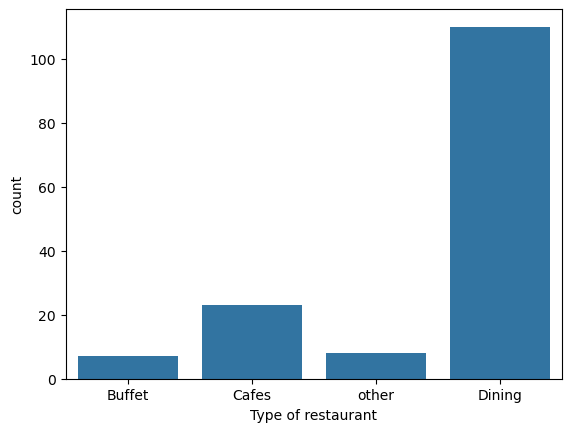

In [22]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

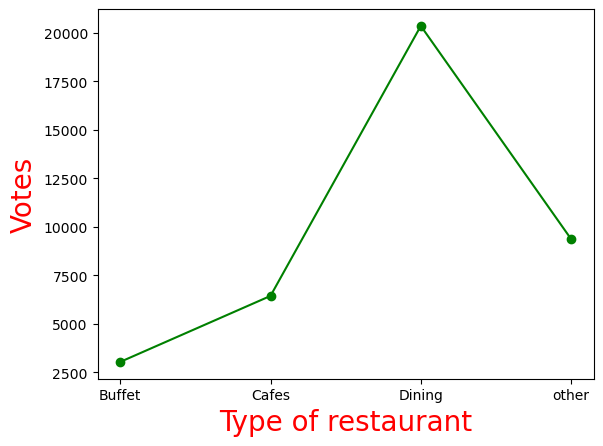

In [28]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)


In [38]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print('Restaurant with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

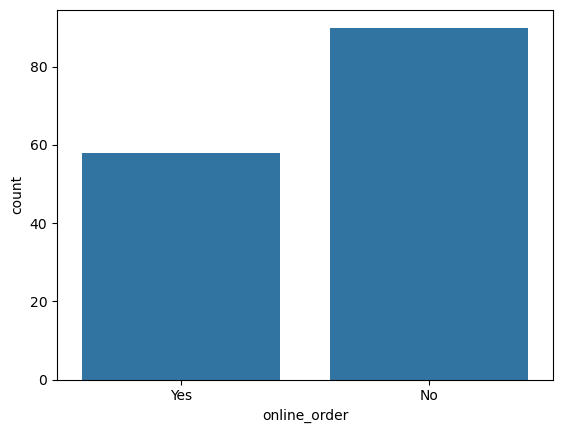

In [40]:
sns.countplot(x=df['online_order'])

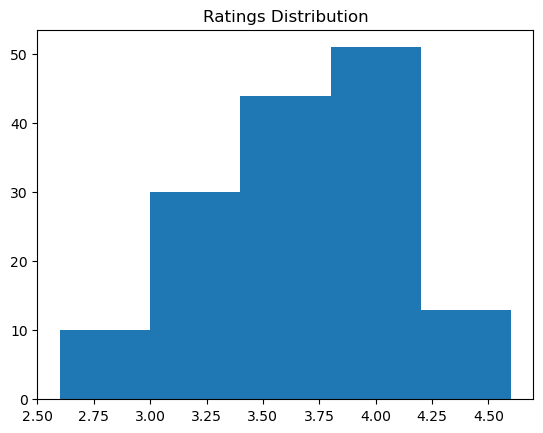

In [42]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

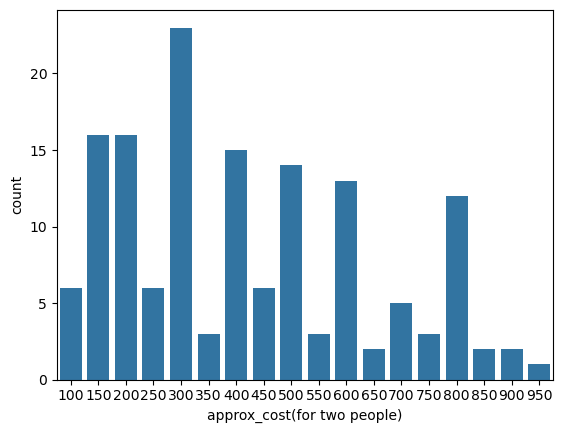

In [44]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

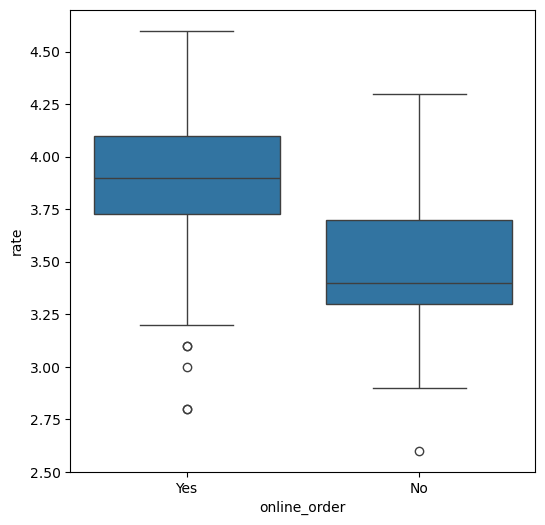

In [46]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

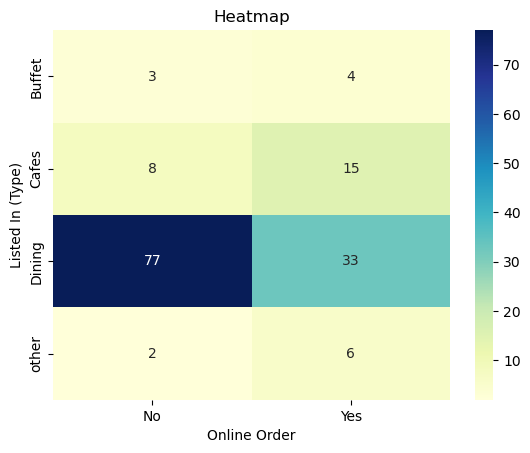

In [48]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

C:\Users\ravim\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R^2 Score on Test Set: 0.08831082288686753


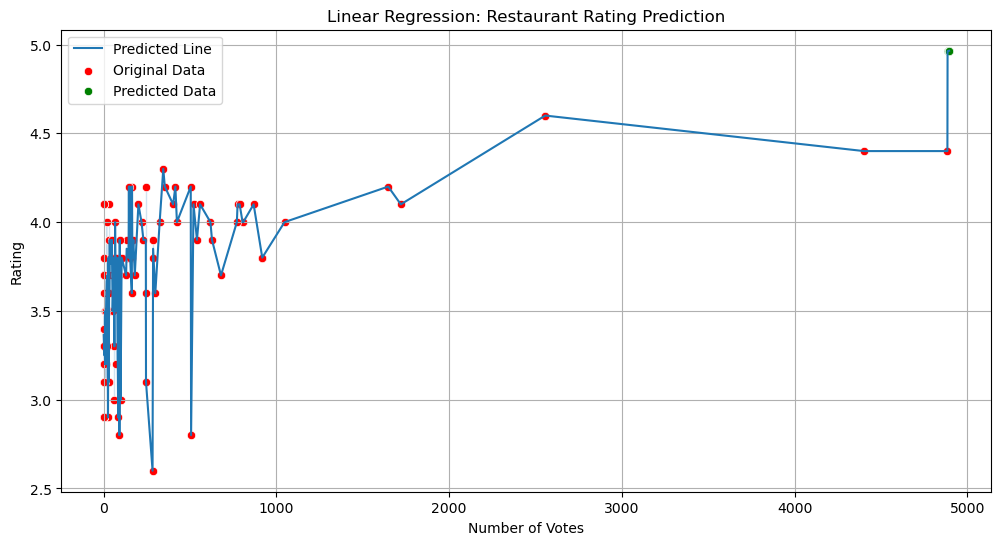

In [9]:

# Data preprocessing
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)

# Selecting features for the model
X = df[['votes']]  # Feature: number of votes
y = df['rate']   # Target: rating

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting future values
future_votes = np.array(range(df['votes'].max() + 1, df['votes'].max() + 11)).reshape(-1, 1)  # Next 10 values
future_rates = model.predict(future_votes)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print(f'R^2 Score on Test Set: {r2}')

# Creating a DataFrame for the future predictions
future_df = pd.DataFrame({'votes': future_votes.flatten(), 'rate': future_rates})

# Combining actual data with future predictions for plotting
plot_df = pd.concat([df[['votes', 'rate']], future_df], ignore_index=True)

# Plotting
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(x='votes', y='rate', data=plot_df, label='Predicted Line')

# Scatter plot for the original data
sns.scatterplot(x=df['votes'], y=df['rate'], color='red', label='Original Data')

# Scatter plot for the predicted data
sns.scatterplot(x=future_df['votes'], y=future_df['rate'], color='green', label='Predicted Data')

plt.title('Linear Regression: Restaurant Rating Prediction')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()
